In [329]:
#Initial Findings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [330]:
inv_df = pd.read_csv('investments.csv')
acq_df = pd.read_csv('acquisitions.csv')
obj_df = pd.read_csv('objects.csv')
fund_round_df = pd.read_csv('funding_rounds.csv')
fund_df = pd.read_csv('funds.csv')

/Users/anthonyyan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3,7,9,10,17,18,21,22,23,25,26,29,30,37) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [331]:
inv_df.head()

,id,funding_round_id,funded_object_id,investor_object_id,created_at,updated_at
0,1,1,c:4,f:1,2007-07-04 04:52:57,2008-02-27 23:14:29
1,2,1,c:4,f:2,2007-07-04 04:52:57,2008-02-27 23:14:29
2,3,3,c:5,f:4,2007-05-27 06:09:10,2013-06-28 20:07:23
3,4,4,c:5,f:1,2007-05-27 06:09:36,2013-06-28 20:07:24
4,5,4,c:5,f:5,2007-05-27 06:09:36,2013-06-28 20:07:24


In [332]:
acq_df.head()

,id,acquisition_id,acquiring_object_id,acquired_object_id,term_code,price_amount,price_currency_code,acquired_at,source_url,source_description,created_at,updated_at
0,1,1,c:11,c:10,NaN,20000000.0,USD,2007-05-30,http://venturebeat.com/2007/05/30/fox-interact...,Fox Interactive confirms purchase of Photobuck...,2007-05-31 22:19:54,2008-05-21 19:23:44
1,2,7,c:59,c:72,cash,60000000.0,USD,2007-07-01,http://www.techcrunch.com/2007/07/02/deal-is-c...,Deal is Confirmed: Google Acquired GrandCentral,2007-07-03 08:14:50,2011-05-06 21:51:05
2,3,8,c:24,c:132,cash,280000000.0,USD,2007-05-01,http://www.techcrunch.com/2007/05/30/cbs-acqui...,CBS Acquires Europeâs Last.fm for $280 million,2007-07-12 04:19:24,2008-05-19 04:48:50
3,4,9,c:59,c:155,cash,100000000.0,USD,2007-06-01,http://techcrunch.com/2007/05/23/100-million-p...,$100 Million Payday For Feedburner  This Deal...,2007-07-13 09:52:59,2012-06-05 03:22:17
4,5,10,c:212,c:215,cash,25000000.0,USD,2007-07-01,http://blog.seattlepi.nwsource.com/venture/arc...,seatlepi.com,2007-07-20 05:29:07,2008-02-25 00:23:47


In [333]:
obj_df

,id,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,...,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at
0,c:1,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,...,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,17,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00
1,c:10,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaN,...,NaN,0,0.0,NaN,NaN,0,6,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14
2,c:100,Company,100,NaN,There,there,/company/there,games_video,acquired,NaN,...,NaN,0,0.0,2003-02-01,2011-09-23,4,12,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48
3,c:10000,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,...,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18
4,c:10001,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,...,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462646,r:9995,Product,9995,c:14164,"SiteLink, listing feed for Brokerages",sitelink listing feed for brokerages,/product/sitelink-listing-feed-for-brokerages,NaN,operating,NaN,...,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-11-28 14:34:12,2008-11-28 23:24:22
462647,r:9996,Product,9996,c:14164,"EDCLink, listing feed for Economic Development...",edclink listing feed for economic development ...,/product/edclink-listing-feed-for-economic-dev...,NaN,operating,NaN,...,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-11-28 14:34:13,2008-11-28 23:24:23
462648,r:9997,Product,9997,c:14164,"Cmail, broadcast email marketing",cmail broadcast email marketing,/product/cmail-broadcast-email-marketing,NaN,operating,NaN,...,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-11-28 14:34:13,2008-11-28 23:24:23
462649,r:9998,Product,9998,c:14164,"CatylistCRM, contact database",catylistcrm contact database,/product/catylistcrm-contact-database,NaN,operating,NaN,...,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-11-28 14:34:13,2008-11-28 23:24:23


# Add 'Number of Acquisitions' feature to Object Dataset

<AxesSubplot:>

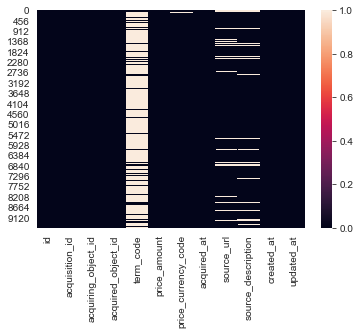

In [334]:
#check for gaps in data
sns.heatmap(acq_df.isnull())

<AxesSubplot:xlabel='acquiring_object_id'>

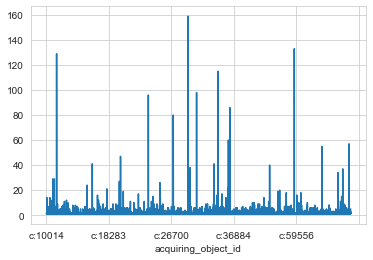

In [335]:
#groupby to aggregate common acquiring object ids
by_acquiring = acq_df.groupby(by='acquiring_object_id').count()
by_acquiring['id'].plot(kind='line')

In [336]:
def getCompany(value):
    row = obj_df[obj_df['id'] == value]
    row.reset_index(inplace=True)
    if row.shape[0] != 0:
        company = row.loc[0,"name"]
        return company
    else:
        return 'Not Found'

def getID(company):
    row = obj_df[obj_df['name'] == company]
    row.reset_index(inplace=True)
    if row.shape[0] != 0:
        obj_id = row.loc[0,"id"]
        return obj_id
    else:
        return 'Not Found'
    

In [337]:
#change id values to company names
acq = by_acquiring.reset_index()
acq.head()
acq['acquiring_object_id'].isnull().value_counts()

False    4872
Name: acquiring_object_id, dtype: int64

In [338]:
#check for more null values
#sns.heatmap(acq_df.isnull(),yticklabels=False,cbar=False)
#sns.heatmap(obj_df.isnull(),yticklabels=False,cbar=False)

#fill in the null values
obj_df['name'].fillna(value='Unnamed',inplace=True)
obj_df['name'].isnull().value_counts()

False    462651
Name: name, dtype: int64

In [339]:
acq['acquiring_object_id']

0        c:10014
1       c:100331
2        c:10066
3        c:10069
4       c:100704
          ...   
4867      c:9931
4868      c:9947
4869      c:9952
4870      c:9992
4871      c:9996
Name: acquiring_object_id, Length: 4872, dtype: object

In [340]:
#Swap id's with their company name
acq['Company'] = acq['acquiring_object_id'].apply(lambda a: getCompany(a))

In [341]:
new_acq = acq.drop('acquiring_object_id',inplace=False,axis=1)
new_acq.head()

,id,acquisition_id,acquired_object_id,term_code,price_amount,price_currency_code,acquired_at,source_url,source_description,created_at,updated_at,Company
0,1,1,1,0,1,1,1,1,1,1,1,Mobclix
1,1,1,1,0,1,1,1,1,1,1,1,Solectria Renewables
2,1,1,1,0,1,1,1,1,1,1,1,Adgregate Markets
3,1,1,1,0,1,1,1,1,1,1,1,PlayPhone
4,1,1,1,0,1,1,1,1,1,1,1,Cactus Commerce


<Figure size 720x432 with 0 Axes>

/Users/anthonyyan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anthonyyan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anthonyyan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anthonyyan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/anthonyyan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/anthonyyan/opt/anaconda3/lib/python3.8/site-pac

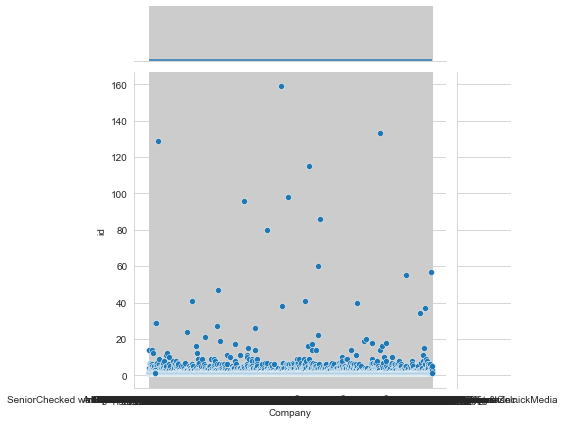

In [342]:
fig = plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.jointplot(x='Company',y='id',data=new_acq)

In [343]:
temp_dict = new_acq[['id','Company']].groupby('Company').sum()
temp_dict.rename(columns={'id':'num_acquisitions','Company':'company'},inplace=True)
acq_count = temp_dict.reset_index()

In [450]:
acq_count
obj_df
byObject

,object_id,id,funding_round_id,raised_amount_usd,pre_money_valuation_usd,post_money_valuation_usd,participants,is_first_round,is_last_round
0,c:1,4089,4089,39750000.0,0.0,0.0,9,1,1
1,c:1001,1644,1644,5000000.0,0.0,0.0,3,1,1
2,c:10014,6682,6682,0.0,0.0,0.0,1,1,1
3,c:10015,148994,148994,68069200.0,0.0,0.0,19,1,1
4,c:100155,108816,108816,10125293.0,0.0,0.0,5,1,1
...,...,...,...,...,...,...,...,...,...
31934,c:99853,25181,25181,500000.0,0.0,0.0,0,1,1
31935,c:9989,9016,9016,1100000.0,0.0,0.0,0,1,1
31936,c:9994,9365,9365,500000.0,0.0,0.0,2,1,1
31937,c:9995,3264,3264,750000.0,0.0,6000000.0,0,1,1


In [345]:
acq_count['id'] = acq_count['Company'].apply(lambda a: getID(a))

In [457]:
#add acquisition numbers for each company to original object dataset
final_df = pd.merge(acq_count,obj_df,on='id')
final_df

,Company,num_acquisitions,id,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,...,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at
0,"(Becton, Dickinson and Company)",1,c:272941,Company,272941,NaN,"(Becton, Dickinson and Company)",becton dickinson and company,/company/becton-dickinson-and-company,NaN,...,NaN,0,0.0,NaN,NaN,0,0,ahmedali,2013-10-19 14:13:10,2013-10-19 14:13:10
1,1-800 We Answer,1,c:66472,Company,66472,NaN,1-800 We Answer,1 800 we answer,/company/1-800-we-answer,NaN,...,NaN,0,0.0,NaN,NaN,0,0,bibilyana,2011-01-18 14:18:10,2011-01-18 14:20:02
2,11i Solutions,2,c:71863,Company,71863,NaN,11i Solutions,11i solutions,/company/11i-solutions,enterprise,...,2011-03-22,1,1800000.0,NaN,NaN,0,0,arun,2011-03-24 04:47:42,2013-09-16 12:59:51
3,1C Company,1,c:8608,Company,8608,NaN,1C Company,1c company,/company/1c-company,software,...,2011-10-03,1,200000000.0,2012-04-11,2012-04-11,1,0,NaN,2008-07-21 16:38:39,2012-02-21 21:18:55
4,1stdibs,1,c:140873,Company,140873,NaN,1stdibs,1stdibs,/company/1stdibs,ecommerce,...,2012-12-03,3,42000000.0,2011-11-01,2011-11-01,1,3,arun,2011-11-04 04:29:09,2013-03-14 03:36:55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4843,xkoto,1,c:1445,Company,1445,NaN,xkoto,xkoto,/company/xkoto,software,...,2009-01-26,3,11035000.0,2007-01-01,2007-01-01,1,3,initial-importer,2007-11-22 12:01:06,2013-10-04 06:03:54
4844,xlr8 Technologies,1,c:26065,Company,26065,NaN,xlr8 Technologies,xlr8 technologies,/company/xlr8-technologies,enterprise,...,NaN,0,0.0,NaN,NaN,0,0,djdiaz,2009-06-30 22:55:01,2009-07-28 01:05:10
4845,xx-well.com GmbH,1,c:196848,Company,196848,NaN,xx-well.com GmbH,xx well,/company/xx-well-com-gmbh,web,...,NaN,0,0.0,2013-01-01,2013-01-01,1,2,jbinbln,2013-04-16 10:49:42,2013-04-16 10:49:55
4846,zanox,1,c:6479,Company,6479,NaN,zanox,zanox,/company/zanox,web,...,NaN,0,0.0,2010-01-01,2012-01-01,3,12,NaN,2008-06-10 14:12:51,2013-03-25 11:26:36


In [347]:
final_df.sort_values(by='num_acquisitions',ascending=False)

,Company,num_acquisitions,id,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,...,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at
884,Cisco,159,c:28,Company,28,NaN,Cisco,cisco,/company/cisco,network_hosting,...,1987-01-01,1,2500000.0,2012-02-07,2013-10-05,5,547,initial-importer,2007-06-09 14:33:35,2013-05-14 18:27:18
1721,Google,133,c:59,Company,59,NaN,Google,google,/company/google,search,...,1999-06-07,2,25100000.0,2012-11-27,2013-12-11,4,1046,initial-importer,2007-06-30 22:18:12,2013-09-12 04:29:42
2600,Microsoft,129,c:1242,Company,1242,NaN,Microsoft,microsoft,/company/microsoft,software,...,NaN,0,0.0,2009-08-08,2013-12-15,4,1189,initial-importer,2007-11-03 12:45:12,2013-03-13 06:01:23
1911,IBM,115,c:3246,Company,3246,NaN,IBM,ibm,/company/ibm,software,...,NaN,0,0.0,2010-03-10,2013-12-09,5,870,michael_becker,2008-03-14 22:55:52,2013-11-06 18:25:42
4614,Yahoo!,98,c:29,Company,29,NaN,Yahoo!,yahoo,/company/yahoo,web,...,1995-11-30,2,6800000.0,2011-01-31,2013-12-11,7,982,initial-importer,2007-11-04 01:48:15,2013-03-13 03:39:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840,Heliocentris,1,c:272178,Company,272178,NaN,Heliocentris,heliocentris,/company/heliocentris,NaN,...,NaN,0,0.0,NaN,NaN,0,0,rahul569,2013-10-16 11:11:20,2013-10-16 11:11:20
1841,Helix Medical,1,c:174929,Company,174929,NaN,Helix Medical,helix medical,/company/helix-medical,biotech,...,NaN,0,0.0,NaN,NaN,0,0,timircha,2012-10-19 04:26:30,2012-10-19 04:34:30
1844,HelloSociety,1,c:207479,Company,207479,NaN,HelloSociety,hellosociety,/company/hellosociety,advertising,...,NaN,0,0.0,2012-06-01,2012-06-01,1,3,katgarcia,2013-05-08 01:37:21,2013-05-11 00:24:18
1845,Hellofood,1,c:207270,Company,207270,NaN,Hellofood,hellofood,/company/foodpanda,hospitality,...,2013-09-09,2,28000000.0,2013-05-01,2013-09-16,3,3,bapi2013,2013-05-07 12:31:39,2013-09-25 23:41:36


In [348]:
final_df.drop(['normalized_name','permalink'],inplace=True,axis=1)

In [349]:
final_df = final_df.drop(['name','entity_id','parent_id'],inplace=False,axis=1)
final_df.head()

,Company,num_acquisitions,id,entity_type,category_code,status,founded_at,closed_at,domain,homepage_url,...,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at
0,"(Becton, Dickinson and Company)",1,c:272941,Company,NaN,operating,NaN,NaN,NaN,NaN,...,NaN,0,0.0,NaN,NaN,0,0,ahmedali,2013-10-19 14:13:10,2013-10-19 14:13:10
1,1-800 We Answer,1,c:66472,Company,NaN,operating,NaN,NaN,weanswer.com,http://www.weanswer.com,...,NaN,0,0.0,NaN,NaN,0,0,bibilyana,2011-01-18 14:18:10,2011-01-18 14:20:02
2,11i Solutions,2,c:71863,Company,enterprise,closed,NaN,2013-05-01,11isolutions.com,http://www.11isolutions.com,...,2011-03-22,1,1800000.0,NaN,NaN,0,0,arun,2011-03-24 04:47:42,2013-09-16 12:59:51
3,1C Company,1,c:8608,Company,software,operating,1991-01-01,NaN,1c.ru,http://1c.ru/eng,...,2011-10-03,1,200000000.0,2012-04-11,2012-04-11,1,0,NaN,2008-07-21 16:38:39,2012-02-21 21:18:55
4,1stdibs,1,c:140873,Company,ecommerce,operating,2001-01-01,NaN,1stdibs.com,http://www.1stdibs.com,...,2012-12-03,3,42000000.0,2011-11-01,2011-11-01,1,3,arun,2011-11-04 04:29:09,2013-03-14 03:36:55


In [350]:
final_df = final_df.drop(['homepage_url','twitter_username','domain','created_by'],inplace=False,axis=1)
final_df.head()

,Company,num_acquisitions,id,entity_type,category_code,status,founded_at,closed_at,logo_url,logo_width,...,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_at,updated_at
0,"(Becton, Dickinson and Company)",1,c:272941,Company,NaN,operating,NaN,NaN,NaN,0,...,NaN,NaN,0,0.0,NaN,NaN,0,0,2013-10-19 14:13:10,2013-10-19 14:13:10
1,1-800 We Answer,1,c:66472,Company,NaN,operating,NaN,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,158,...,NaN,NaN,0,0.0,NaN,NaN,0,0,2011-01-18 14:18:10,2011-01-18 14:20:02
2,11i Solutions,2,c:71863,Company,enterprise,closed,NaN,2013-05-01,http://s3.amazonaws.com/crunchbase_prod_assets...,138,...,2011-03-22,2011-03-22,1,1800000.0,NaN,NaN,0,0,2011-03-24 04:47:42,2013-09-16 12:59:51
3,1C Company,1,c:8608,Company,software,operating,1991-01-01,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,150,...,2011-10-03,2011-10-03,1,200000000.0,2012-04-11,2012-04-11,1,0,2008-07-21 16:38:39,2012-02-21 21:18:55
4,1stdibs,1,c:140873,Company,ecommerce,operating,2001-01-01,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,222,...,2011-11-03,2012-12-03,3,42000000.0,2011-11-01,2011-11-01,1,3,2011-11-04 04:29:09,2013-03-14 03:36:55


In [351]:
final_df = final_df.drop(['short_description','description','overview','city','region','tag_list'],inplace=False,axis=1)

In [352]:
final_df.head()

,Company,num_acquisitions,id,entity_type,category_code,status,founded_at,closed_at,logo_url,logo_width,...,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_at,updated_at
0,"(Becton, Dickinson and Company)",1,c:272941,Company,NaN,operating,NaN,NaN,NaN,0,...,NaN,NaN,0,0.0,NaN,NaN,0,0,2013-10-19 14:13:10,2013-10-19 14:13:10
1,1-800 We Answer,1,c:66472,Company,NaN,operating,NaN,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,158,...,NaN,NaN,0,0.0,NaN,NaN,0,0,2011-01-18 14:18:10,2011-01-18 14:20:02
2,11i Solutions,2,c:71863,Company,enterprise,closed,NaN,2013-05-01,http://s3.amazonaws.com/crunchbase_prod_assets...,138,...,2011-03-22,2011-03-22,1,1800000.0,NaN,NaN,0,0,2011-03-24 04:47:42,2013-09-16 12:59:51
3,1C Company,1,c:8608,Company,software,operating,1991-01-01,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,150,...,2011-10-03,2011-10-03,1,200000000.0,2012-04-11,2012-04-11,1,0,2008-07-21 16:38:39,2012-02-21 21:18:55
4,1stdibs,1,c:140873,Company,ecommerce,operating,2001-01-01,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,222,...,2011-11-03,2012-12-03,3,42000000.0,2011-11-01,2011-11-01,1,3,2011-11-04 04:29:09,2013-03-14 03:36:55


In [353]:
final_df.columns

Index(['Company', 'num_acquisitions', 'id', 'entity_type', 'category_code',
       'status', 'founded_at', 'closed_at', 'logo_url', 'logo_width',
       'logo_height', 'country_code', 'state_code', 'first_investment_at',
       'last_investment_at', 'investment_rounds', 'invested_companies',
       'first_funding_at', 'last_funding_at', 'funding_rounds',
       'funding_total_usd', 'first_milestone_at', 'last_milestone_at',
       'milestones', 'relationships', 'created_at', 'updated_at'],
      dtype='object')

# Visualizations

In [354]:
cat_code_df = final_df.groupby("category_code").sum()
cat_code_df.reset_index(inplace=True)

In [355]:
top_10 = cat_code_df.sort_values(by='num_acquisitions',ascending=False).head(10)

<AxesSubplot:title={'center':'Industries with the Highest Number of Acquisitions'}, xlabel='category_code', ylabel='num_acquisitions'>

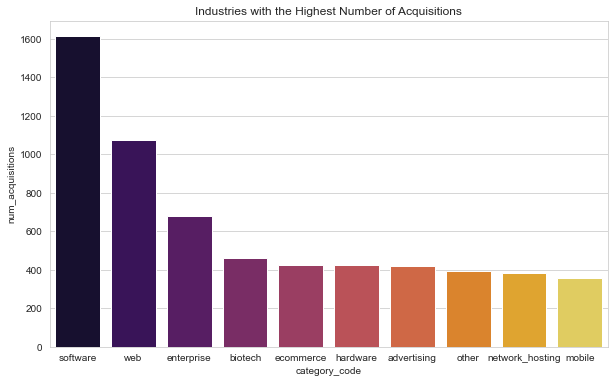

In [356]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
plt.title("Industries with the Highest Number of Acquisitions")
plt.xlabel('Industry')
plt.ylabel('Acquisitions')

sns.barplot(x='category_code',y='num_acquisitions',data=top_10, palette='inferno')

In [357]:
top_10 = cat_code_df.sort_values(by='investment_rounds',ascending=False).head(10)

<AxesSubplot:title={'center':'Industries with the Highest Number of Investment Rounds'}, xlabel='category_code', ylabel='investment_rounds'>

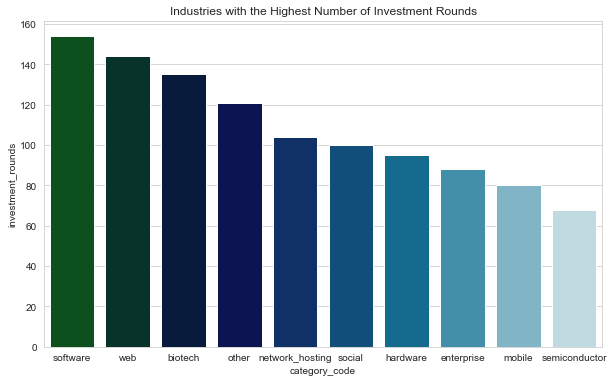

In [358]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
plt.title("Industries with the Highest Number of Investment Rounds")

sns.barplot(x='category_code',y='investment_rounds',data=top_10,palette='ocean')

In [359]:
top_10_companies = final_df.sort_values(by='num_acquisitions',ascending=False)['Company'].head(10)
top_10_companies

884                         Cisco
1721                       Google
2600                    Microsoft
1911                          IBM
4614                       Yahoo!
3389    Rent My Vacation Home USA
1856              Hewlett-Packard
2982           Oracle Corporation
80                            AOL
1271                          EMC
Name: Company, dtype: object

<AxesSubplot:title={'center':'Companies with the Highest Number of Acquisitions'}, xlabel='Company', ylabel='num_acquisitions'>

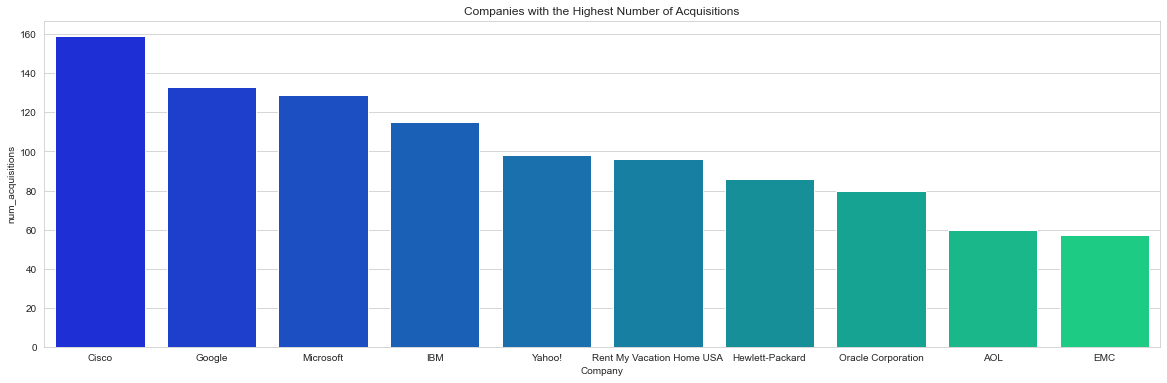

In [360]:
plt.figure(figsize=(20,6))
sns.set_style('whitegrid')
plt.title("Companies with the Highest Number of Acquisitions")

sns.barplot(x=top_10_companies, y='num_acquisitions',data=final_df,palette='winter')

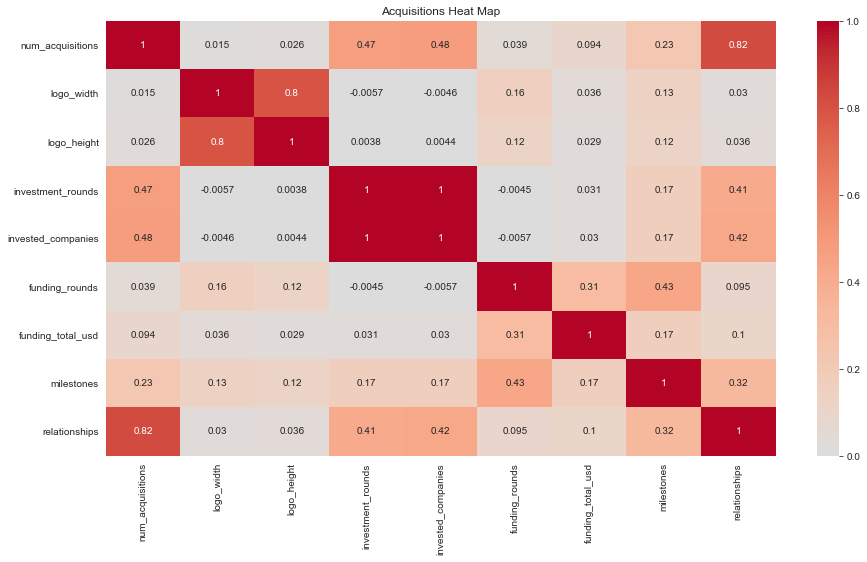

In [361]:
#Create Correlation Heat Map
plt.figure(figsize=(15,8))
plt.title('Acquisitions Heat Map')

chart = sns.heatmap(final_df.corr(), center = 0, annot = True, vmin = 0, vmax = 1,cmap='coolwarm')

# Dataset Cleaning and Preparation

In [362]:
final_df.head()
acq_df = final_df
start_df = acq_df
start_df.head()

,Company,num_acquisitions,id,entity_type,category_code,status,founded_at,closed_at,logo_url,logo_width,...,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_at,updated_at
0,"(Becton, Dickinson and Company)",1,c:272941,Company,NaN,operating,NaN,NaN,NaN,0,...,NaN,NaN,0,0.0,NaN,NaN,0,0,2013-10-19 14:13:10,2013-10-19 14:13:10
1,1-800 We Answer,1,c:66472,Company,NaN,operating,NaN,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,158,...,NaN,NaN,0,0.0,NaN,NaN,0,0,2011-01-18 14:18:10,2011-01-18 14:20:02
2,11i Solutions,2,c:71863,Company,enterprise,closed,NaN,2013-05-01,http://s3.amazonaws.com/crunchbase_prod_assets...,138,...,2011-03-22,2011-03-22,1,1800000.0,NaN,NaN,0,0,2011-03-24 04:47:42,2013-09-16 12:59:51
3,1C Company,1,c:8608,Company,software,operating,1991-01-01,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,150,...,2011-10-03,2011-10-03,1,200000000.0,2012-04-11,2012-04-11,1,0,2008-07-21 16:38:39,2012-02-21 21:18:55
4,1stdibs,1,c:140873,Company,ecommerce,operating,2001-01-01,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,222,...,2011-11-03,2012-12-03,3,42000000.0,2011-11-01,2011-11-01,1,3,2011-11-04 04:29:09,2013-03-14 03:36:55


In [363]:
start_df = start_df.drop(['logo_url','logo_width','logo_height','created_at','updated_at'],axis=1,inplace=False)
start_df.columns

Index(['Company', 'num_acquisitions', 'id', 'entity_type', 'category_code',
       'status', 'founded_at', 'closed_at', 'country_code', 'state_code',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships'],
      dtype='object')

In [364]:
start_df.head()

,Company,num_acquisitions,id,entity_type,category_code,status,founded_at,closed_at,country_code,state_code,...,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships
0,"(Becton, Dickinson and Company)",1,c:272941,Company,NaN,operating,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,0,0.0,NaN,NaN,0,0
1,1-800 We Answer,1,c:66472,Company,NaN,operating,NaN,NaN,USA,NY,...,0,0,NaN,NaN,0,0.0,NaN,NaN,0,0
2,11i Solutions,2,c:71863,Company,enterprise,closed,NaN,2013-05-01,USA,AL,...,0,0,2011-03-22,2011-03-22,1,1800000.0,NaN,NaN,0,0
3,1C Company,1,c:8608,Company,software,operating,1991-01-01,NaN,RUS,NaN,...,1,1,2011-10-03,2011-10-03,1,200000000.0,2012-04-11,2012-04-11,1,0
4,1stdibs,1,c:140873,Company,ecommerce,operating,2001-01-01,NaN,USA,NY,...,0,0,2011-11-03,2012-12-03,3,42000000.0,2011-11-01,2011-11-01,1,3


<AxesSubplot:xlabel='status', ylabel='count'>

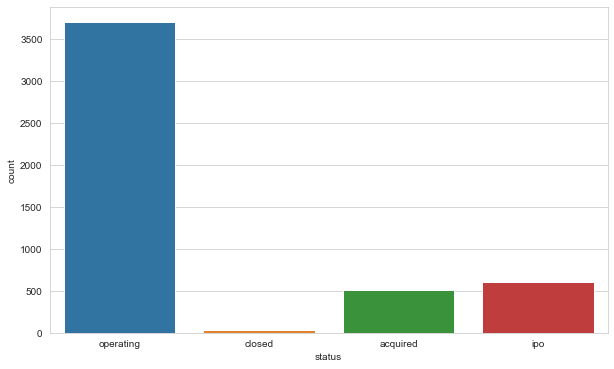

In [365]:
plt.figure(figsize=(10,6))
sns.countplot(x='status',data=start_df)

In [366]:
#All companies have a status
start_df['status'].isnull().value_counts()

False    4848
Name: status, dtype: int64

<AxesSubplot:>

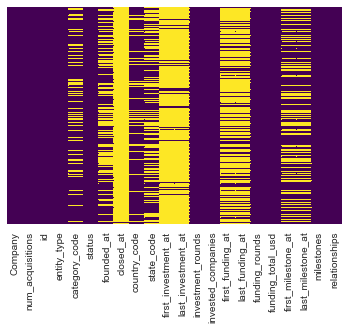

In [367]:
sns.heatmap(start_df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

Judging from the heatmap, we want to drop all 'date' type variables ('first_investment_ad','last_investment_at','closed_at', etc.)

In [368]:
start_df = start_df.drop(['first_investment_at','last_investment_at','closed_at','founded_at','state_code',
                      'first_funding_at','last_funding_at','first_milestone_at','last_milestone_at'],
                     axis=1,inplace=False)

In [369]:
start_df.head()

,Company,num_acquisitions,id,entity_type,category_code,status,country_code,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships
0,"(Becton, Dickinson and Company)",1,c:272941,Company,NaN,operating,NaN,0,0,0,0.0,0,0
1,1-800 We Answer,1,c:66472,Company,NaN,operating,USA,0,0,0,0.0,0,0
2,11i Solutions,2,c:71863,Company,enterprise,closed,USA,0,0,1,1800000.0,0,0
3,1C Company,1,c:8608,Company,software,operating,RUS,1,1,1,200000000.0,1,0
4,1stdibs,1,c:140873,Company,ecommerce,operating,USA,0,0,3,42000000.0,1,3


In [370]:
start_df['category_code'].nunique()#42
start_df['entity_type'].nunique() #1
start_df['investment_rounds'].isnull().value_counts() #all False
start_df['invested_companies'].isnull().value_counts() #all False
start_df['funding_rounds'].isnull().value_counts() #all False
start_df['funding_total_usd'].isnull().value_counts() #all False
start_df['milestones'].isnull().value_counts() #all False
start_df['relationships'].isnull().value_counts() #all False

False    4848
Name: relationships, dtype: int64

# Without funding_round Dataset Features

In [557]:
start_df

,Company,num_acquisitions,entity_type,category_code,status,country_code,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,object_id
0,"(Becton, Dickinson and Company)",1,Company,NaN,operating,NaN,0,0,0,0.0,0,0,c:272941
1,1-800 We Answer,1,Company,NaN,operating,USA,0,0,0,0.0,0,0,c:66472
2,11i Solutions,2,Company,enterprise,closed,USA,0,0,1,1800000.0,0,0,c:71863
3,1C Company,1,Company,software,operating,RUS,1,1,1,200000000.0,1,0,c:8608
4,1stdibs,1,Company,ecommerce,operating,USA,0,0,3,42000000.0,1,3,c:140873
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4843,xkoto,1,Company,software,closed,USA,0,0,3,11035000.0,1,3,c:1445
4844,xlr8 Technologies,1,Company,enterprise,operating,USA,0,0,0,0.0,0,0,c:26065
4845,xx-well.com GmbH,1,Company,web,operating,DEU,0,0,0,0.0,1,2,c:196848
4846,zanox,1,Company,web,operating,DEU,0,0,0,0.0,3,12,c:6479


In [558]:
startup_df = start_df.drop(['entity_type','country_code','Company','category_code','object_id'],inplace=False,axis=1)

In [562]:
status = pd.get_dummies(startup_df['status'])

In [566]:
start_up_2 = pd.concat([startup_df,status], axis = 1)

In [567]:
X = start_up_2.drop(['acquired','closed','status','operating','ipo'],axis =1, inplace = False)

In [569]:
y = start_up_2['ipo']

In [572]:
from sklearn.model_selection import train_test_split

In [672]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Creating and Fitting the Logistic Regression Model

In [673]:
from sklearn.linear_model import LogisticRegression

In [674]:
logmodel = LogisticRegression()

In [675]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [676]:
predictions = logmodel.predict(X_test)

# Evaluation

In [677]:
from sklearn.metrics import classification_report, confusion_matrix

In [678]:
report = classification_report(y_test,predictions)
print(report) 

              precision    recall  f1-score   support

           0       0.88      1.00      0.93      1275
           1       0.00      0.00      0.00       180

    accuracy                           0.88      1455
   macro avg       0.44      0.50      0.47      1455
weighted avg       0.77      0.88      0.82      1455



/Users/anthonyyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


None predicted to be IPO! 

In [679]:
matrix = confusion_matrix(y_test,predictions)
confusion_df = pd.DataFrame(matrix,['Actual No','Actual Yes'],['Predict No','Predict Yes'])

In [680]:
confusion_df

,Predict No,Predict Yes
Actual No,1275,0
Actual Yes,180,0


Very bad performance!

# K-Nearest Neighbors Model

In [681]:
from sklearn.neighbors import KNeighborsClassifier

In [682]:
error_rate = []
for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    error_rate.append(np.mean(y_test != predictions))

<AxesSubplot:title={'center':'Error Rate Vs. K'}>

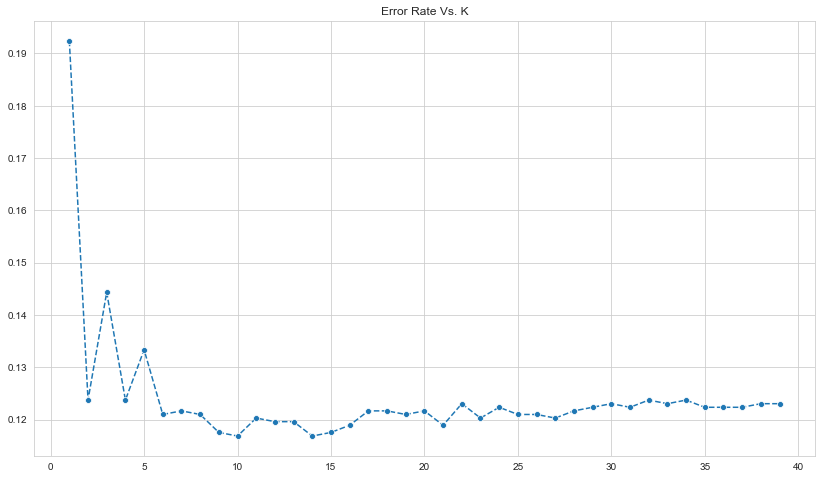

In [683]:
plt.figure(figsize=(14,8))
plt.title('Error Rate Vs. K')
sns.lineplot(x=range(1,40),y=error_rate,marker='o',ls='--')

In [684]:
#Find and use minimum k value
min_k = error_rate.index(min(error_rate))
min_k

9

In [685]:
knn = KNeighborsClassifier(n_neighbors=9)

In [686]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [687]:
predictions = knn.predict(X_test)

In [688]:
report = classification_report(y_test,predictions)
print(report) 

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1275
           1       0.67      0.10      0.17       180

    accuracy                           0.88      1455
   macro avg       0.78      0.55      0.56      1455
weighted avg       0.86      0.88      0.84      1455



In [689]:
matrix = confusion_matrix(y_test,predictions)
confusion_df = pd.DataFrame(matrix,['Actual No','Actual Yes'],['Predict No','Predict Yes'])

In [690]:
confusion_df

,Predict No,Predict Yes
Actual No,1266,9
Actual Yes,162,18


Better Performance than Logistic Model

Need to concentrate on minimizing Type II error

# Add funding_round Dataset Features

Repeat Logistic and K-Nearest Neighbors Model as above with added features from funding_round dataset

In [372]:
fund_round_df.head()

,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,...,post_money_valuation,post_money_currency_code,participants,is_first_round,is_last_round,source_url,source_description,created_by,created_at,updated_at
0,1,1,c:4,2006-12-01,series-b,b,8500000.0,8500000.0,USD,0.0,...,0.0,NaN,2,0,0,http://www.marketingvox.com/archives/2006/12/2...,NaN,initial-importer,2007-07-04 04:52:57,2008-02-27 23:14:29
1,2,2,c:5,2004-09-01,angel,angel,500000.0,500000.0,USD,0.0,...,0.0,USD,2,0,1,NaN,NaN,initial-importer,2007-05-27 06:08:18,2013-06-28 20:07:23
2,3,3,c:5,2005-05-01,series-a,a,12700000.0,12700000.0,USD,115000000.0,...,0.0,USD,3,0,0,http://www.techcrunch.com/2007/11/02/jim-breye...,Jim Breyer: Extra $500 Million Round For Faceb...,initial-importer,2007-05-27 06:09:10,2013-06-28 20:07:23
3,4,4,c:5,2006-04-01,series-b,b,27500000.0,27500000.0,USD,525000000.0,...,0.0,USD,4,0,0,http://www.facebook.com/press/info.php?factsheet,Facebook Funding,initial-importer,2007-05-27 06:09:36,2013-06-28 20:07:24
4,5,5,c:7299,2006-05-01,series-b,b,10500000.0,10500000.0,USD,0.0,...,0.0,NaN,2,0,0,http://www.techcrunch.com/2006/05/14/photobuck...,PhotoBucket Closes $10.5M From Trinity Ventures,initial-importer,2007-05-29 11:05:59,2008-04-16 17:09:12


In [392]:
byObject = fund_round_df.groupby('object_id').sum()
byObject.head()

,id,funding_round_id,raised_amount_usd,raised_amount,pre_money_valuation_usd,pre_money_valuation,post_money_valuation_usd,post_money_valuation,participants,is_first_round,is_last_round
object_id,,,,,,,,,,,
c:1,4089,4089,39750000.0,39750000.0,0.0,0.0,0.0,0.0,9,1,1
c:1001,1644,1644,5000000.0,5000000.0,0.0,0.0,0.0,0.0,3,1,1
c:10014,6682,6682,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1
c:10015,148994,148994,68069200.0,68069200.0,0.0,0.0,0.0,0.0,19,1,1
c:100155,108816,108816,10125293.0,10125293.0,0.0,0.0,0.0,0.0,5,1,1


In [393]:
#Drop non-USD variables
byObject.drop(['raised_amount','pre_money_valuation','post_money_valuation'],axis=1,inplace=True)

In [394]:
byObject.reset_index(inplace=True)

In [574]:
start_df

,Company,num_acquisitions,entity_type,category_code,status,country_code,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,object_id
0,"(Becton, Dickinson and Company)",1,Company,NaN,operating,NaN,0,0,0,0.0,0,0,c:272941
1,1-800 We Answer,1,Company,NaN,operating,USA,0,0,0,0.0,0,0,c:66472
2,11i Solutions,2,Company,enterprise,closed,USA,0,0,1,1800000.0,0,0,c:71863
3,1C Company,1,Company,software,operating,RUS,1,1,1,200000000.0,1,0,c:8608
4,1stdibs,1,Company,ecommerce,operating,USA,0,0,3,42000000.0,1,3,c:140873
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4843,xkoto,1,Company,software,closed,USA,0,0,3,11035000.0,1,3,c:1445
4844,xlr8 Technologies,1,Company,enterprise,operating,USA,0,0,0,0.0,0,0,c:26065
4845,xx-well.com GmbH,1,Company,web,operating,DEU,0,0,0,0.0,1,2,c:196848
4846,zanox,1,Company,web,operating,DEU,0,0,0,0.0,3,12,c:6479


In [ ]:
start_df['object_id'] = start_df['id']
start_df.drop(['id'],axis=1,inplace=True)
start_df.head()

All objects are companies

<AxesSubplot:>

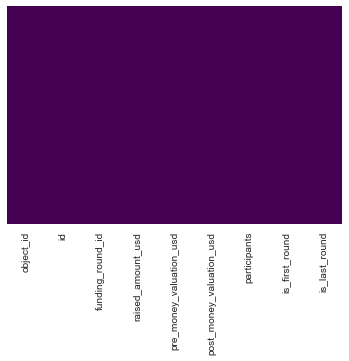

In [406]:
sns.heatmap(byObject.isnull(), yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

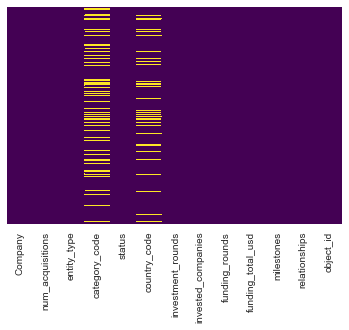

In [458]:
sns.heatmap(start_df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [460]:
final = start_df.merge(byObject,on='object_id',how='inner')
final

,Company,num_acquisitions,entity_type,category_code,status,country_code,investment_rounds,invested_companies,funding_rounds,funding_total_usd,...,relationships,object_id,id,funding_round_id,raised_amount_usd,pre_money_valuation_usd,post_money_valuation_usd,participants,is_first_round,is_last_round
0,11i Solutions,2,Company,enterprise,closed,USA,0,0,1,1800000.0,...,0,c:71863,22092,22092,1800000.0,0.0,0.0,1,1,1
1,1C Company,1,Company,software,operating,RUS,1,1,1,200000000.0,...,0,c:8608,25731,25731,200000000.0,0.0,0.0,1,1,1
2,1stdibs,1,Company,ecommerce,operating,USA,0,0,3,42000000.0,...,3,c:140873,96695,96695,42000000.0,0.0,0.0,5,1,1
3,2080 Media,1,Company,news,operating,USA,0,0,5,41000000.0,...,0,c:60175,209275,209275,41000000.0,0.0,0.0,8,1,1
4,23andMe,1,Company,biotech,operating,USA,0,0,6,160549892.0,...,41,c:1062,124419,124419,160549892.0,0.0,0.0,19,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1514,uShip,1,Company,transportation,operating,USA,0,0,5,44709996.0,...,9,c:1343,199341,199341,44709996.0,0.0,0.0,5,1,1
1515,uTest,1,Company,software,operating,USA,0,0,5,37800000.0,...,12,c:1095,52724,52724,37800000.0,0.0,0.0,10,1,1
1516,uromovie,1,Company,games_video,operating,USA,0,0,1,2000.0,...,1,c:171192,32518,32518,2000.0,0.0,50000.0,1,1,1
1517,xkoto,1,Company,software,closed,USA,0,0,3,11035000.0,...,3,c:1445,25324,25324,11035000.0,0.0,0.0,5,1,1


<AxesSubplot:>

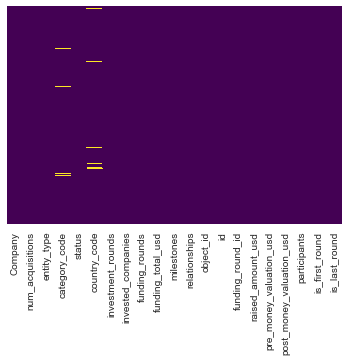

In [461]:
sns.heatmap(final.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [462]:
final.drop(['category_code','country_code'],axis=1,inplace=True)
final.drop(['is_first_round','is_last_round'],axis=1,inplace=True)
final.drop(['id','object_id'],axis=1,inplace=True)

In [482]:
status = pd.get_dummies(final['status'])
status

,acquired,closed,ipo,operating
0,0,1,0,0
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
1514,0,0,0,1
1515,0,0,0,1
1516,0,0,0,1
1517,0,1,0,0


In [485]:
pd.concat([startup,status], axis = 1)
startup.drop(['status','entity_type'],inplace=True,axis=1)

In [488]:
startup.head()

,Company,num_acquisitions,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,funding_round_id,raised_amount_usd,pre_money_valuation_usd,post_money_valuation_usd,participants,acquired,closed,ipo,operating
0,11i Solutions,2,0,0,1,1800000.0,0,0,22092,1800000.0,0.0,0.0,1,0,1,0,0
1,1C Company,1,1,1,1,200000000.0,1,0,25731,200000000.0,0.0,0.0,1,0,0,0,1
2,1stdibs,1,0,0,3,42000000.0,1,3,96695,42000000.0,0.0,0.0,5,0,0,0,1
3,2080 Media,1,0,0,5,41000000.0,0,0,209275,41000000.0,0.0,0.0,8,0,0,0,1
4,23andMe,1,0,0,6,160549892.0,3,41,124419,160549892.0,0.0,0.0,19,0,0,0,1


In [507]:
#predict which companies will ipo
pred_ipo = startup.drop(['closed','acquired','operating'],inplace=False,axis=1)
pred_ipo

,Company,num_acquisitions,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,funding_round_id,raised_amount_usd,pre_money_valuation_usd,post_money_valuation_usd,participants,ipo
0,11i Solutions,2,0,0,1,1800000.0,0,0,22092,1800000.0,0.0,0.0,1,0
1,1C Company,1,1,1,1,200000000.0,1,0,25731,200000000.0,0.0,0.0,1,0
2,1stdibs,1,0,0,3,42000000.0,1,3,96695,42000000.0,0.0,0.0,5,0
3,2080 Media,1,0,0,5,41000000.0,0,0,209275,41000000.0,0.0,0.0,8,0
4,23andMe,1,0,0,6,160549892.0,3,41,124419,160549892.0,0.0,0.0,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1514,uShip,1,0,0,5,44709996.0,3,9,199341,44709996.0,0.0,0.0,5,0
1515,uTest,1,0,0,5,37800000.0,0,12,52724,37800000.0,0.0,0.0,10,0
1516,uromovie,1,0,0,1,2000.0,1,1,32518,2000.0,0.0,50000.0,1,0
1517,xkoto,1,0,0,3,11035000.0,1,3,25324,11035000.0,0.0,0.0,5,0


Major Drawback: some mismatch leads to significant decrease in data (from 4848 to 1519 samples, nearly 70% decrease)

<AxesSubplot:title={'center':'Funding Rounds and Acquisitions Aggregate Heatmap'}>

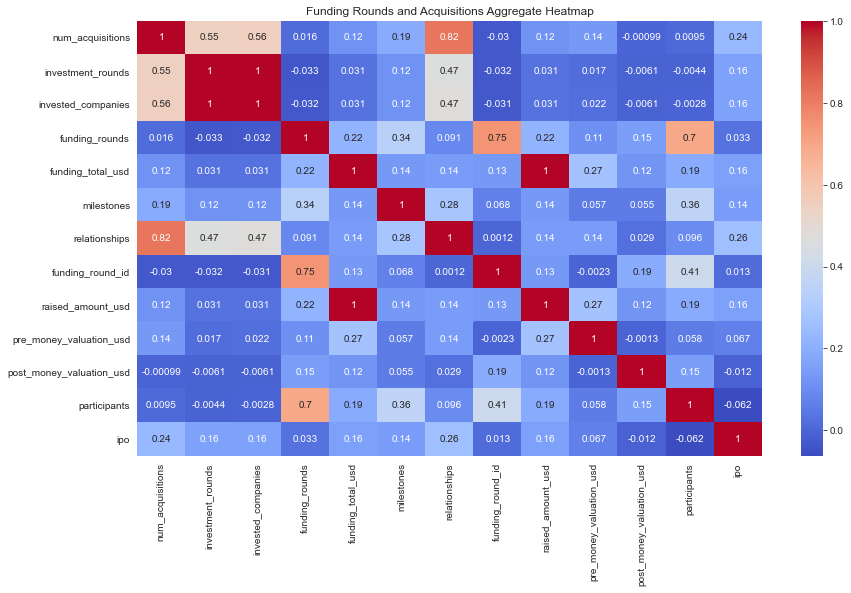

In [697]:
plt.figure(figsize=(14,8))
plt.title('Funding Rounds and Acquisitions Aggregate Heatmap')
sns.heatmap(pred_ipo.corr(),cmap='coolwarm',annot=True )

Helpful Heatmap summing up all variables

In [510]:
#Preparing train-test split
X = pred_ipo.drop(['Company','ipo'],axis=1,inplace=False)
y = pred_ipo['ipo']

In [512]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Creating and Fitting the Logistic Regression Model

In [524]:
logmodel = LogisticRegression()

In [525]:
logmodel.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

# Predict and Evaluate 

In [526]:
ipo_predictions = logmodel.predict(X_test)

In [527]:
#equal
ipo_predictions.size
y_test.size

456

In [529]:
report = classification_report(y_test, ipo_predictions)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       393
           1       0.17      0.02      0.03        63

    accuracy                           0.85       456
   macro avg       0.51      0.50      0.47       456
weighted avg       0.77      0.85      0.80       456



In [532]:
matrix = confusion_matrix(y_test,ipo_predictions)
confusion_df = pd.DataFrame(matrix,['Actual No','Actual Yes'],['Predict No','Predict Yes'])

In [533]:
confusion_df.head() #pretty bad

,Predict No,Predict Yes
Actual No,388,5
Actual Yes,62,1


# K-Nearest Neighbor Model

In [534]:
from sklearn.neighbors import KNeighborsClassifier

In [535]:
error_rate = []
for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    error_rate.append(np.mean(y_test != predictions))

<AxesSubplot:title={'center':'Error Rate Vs. K'}>

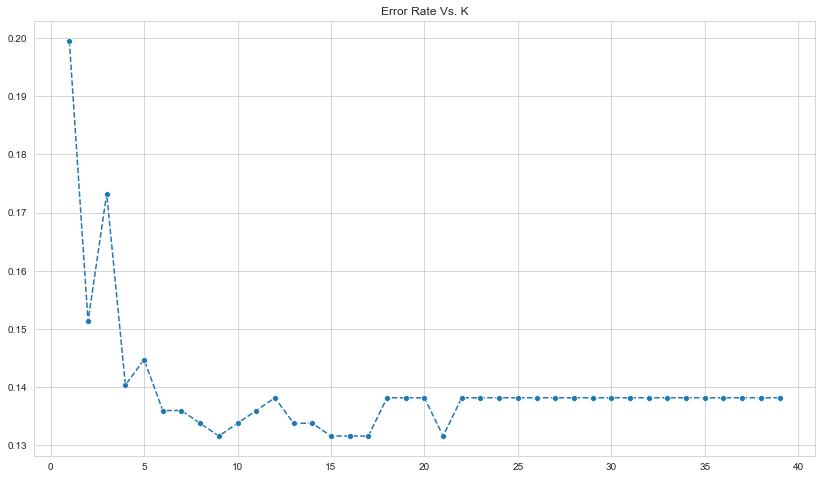

In [541]:
plt.figure(figsize=(14,8))
plt.title('Error Rate Vs. K')
sns.lineplot(x=range(1,40),y=error_rate,marker='o',ls='--')

In [543]:
#Find and use minimum k
min_k = error_rate.index(min(error_rate))
min_k

8

In [544]:
knn = KNeighborsClassifier(n_neighbors=min_k)

In [545]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [546]:
predictions = knn.predict(X_test)

In [547]:
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       393
           1       0.67      0.06      0.12        63

    accuracy                           0.87       456
   macro avg       0.77      0.53      0.52       456
weighted avg       0.84      0.87      0.82       456



In [550]:
matrix = confusion_matrix(y_test,predictions)
confusion_df = pd.DataFrame(matrix,['Actual No','Actual Yes'],['Predict No','Predict Yes'])

In [551]:
confusion_df

,Predict No,Predict Yes
Actual No,391,2
Actual Yes,59,4


Performed somewhat better than Logistic Model

Improvements - minimize Type II error (59 too high)